# Build Q & A Application using Pinecone Vector Database

Install all the necessary requirements

In [ ]:
!pip install -r requirements.txt

Import all the necessary libraries

In [50]:
# import Libraries
import os
import pinecone 
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Pinecone
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from dotenv import load_dotenv
from langchain.chains.question_answering import load_qa_chain
from langchain_community.llms import HuggingFaceHub

Import all your environmental variables

In [52]:
load_dotenv()

True

Read the document

In [53]:
## Lets Read the document
def read_doc(directory):
    file_loader=PyPDFDirectoryLoader(directory)
    documents=file_loader.load()
    return documents

In [54]:
doc=read_doc('documents/')
# To know the number of pages
len(doc)

58

In [55]:
# Display the doc
doc

[Document(page_content='GOVERNMENT OF INDIA\nBUDGET 2023-2024\nSPEECH\nOF\nNIRMALA SITHARAMAN\nMINISTER OF FINANCE\nFebruary 1,  2023', metadata={'source': 'documents\\budget_speech.pdf', 'page': 0}),
 Document(page_content='', metadata={'source': 'documents\\budget_speech.pdf', 'page': 1}),
 Document(page_content='CONTENTS \nPART-A \n Page No.  \n\uf0b7 Introduction 1 \n\uf0b7 Achievements since 2014: Leaving no one behind 2 \n\uf0b7 Vision for Amrit Kaal  – an empowered and inclusive economy 3 \n\uf0b7 Priorities of this Budget 5 \ni. Inclusive Development  \nii. Reaching the Last Mile \niii. Infrastructure and Investment \niv. Unleashing the Potential \nv. Green Growth \nvi. Youth Power  \nvii. Financial Sector  \n \n \n \n \n \n \n \n \n\uf0b7 Fiscal Management 24 \nPART B  \n  \nIndirect Taxes  27 \n\uf0b7 Green Mobility  \n\uf0b7 Electronics   \n\uf0b7 Electrical   \n\uf0b7 Chemicals and Petrochemicals   \n\uf0b7 Marine products  \n\uf0b7 Lab Grown Diamonds  \n\uf0b7 Precious Met

Convert the document into chunks

Why to perform this? Usually there is a model restriction with respect to token size. 

In [56]:
## Divide the docs into chunks
### https://api.python.langchain.com/en/latest/text_splitter/langchain.text_splitter.RecursiveCharacterTextSplitter.html#
def chunk_data(docs,chunk_size=800,chunk_overlap=50):
    text_splitter=RecursiveCharacterTextSplitter(chunk_size=chunk_size,chunk_overlap=chunk_overlap)
    doc=text_splitter.split_documents(docs)
    return doc

In [57]:
documents=chunk_data(docs=doc)
len(documents)

141

In [58]:
documents

[Document(page_content='GOVERNMENT OF INDIA\nBUDGET 2023-2024\nSPEECH\nOF\nNIRMALA SITHARAMAN\nMINISTER OF FINANCE\nFebruary 1,  2023', metadata={'source': 'documents\\budget_speech.pdf', 'page': 0}),
 Document(page_content='CONTENTS \nPART-A \n Page No.  \n\uf0b7 Introduction 1 \n\uf0b7 Achievements since 2014: Leaving no one behind 2 \n\uf0b7 Vision for Amrit Kaal  – an empowered and inclusive economy 3 \n\uf0b7 Priorities of this Budget 5 \ni. Inclusive Development  \nii. Reaching the Last Mile \niii. Infrastructure and Investment \niv. Unleashing the Potential \nv. Green Growth \nvi. Youth Power  \nvii. Financial Sector  \n \n \n \n \n \n \n \n \n\uf0b7 Fiscal Management 24 \nPART B  \n  \nIndirect Taxes  27 \n\uf0b7 Green Mobility  \n\uf0b7 Electronics   \n\uf0b7 Electrical   \n\uf0b7 Chemicals and Petrochemicals   \n\uf0b7 Marine products  \n\uf0b7 Lab Grown Diamonds  \n\uf0b7 Precious Metals  \n\uf0b7 Metals  \n\uf0b7 Compounded Rubber  \n\uf0b7 Cigarettes  \n  \nDirect Taxes  3

Load Embedding model

In [59]:
# loads BAAI/bge-small-en-v1.5
embeddings = HuggingFaceInferenceAPIEmbeddings(api_key=os.environ['HUGGINGFACEHUB_API_TOKEN'], model_name="BAAI/bge-small-en-v1.5")
embeddings

HuggingFaceInferenceAPIEmbeddings(api_key=SecretStr('**********'), model_name='BAAI/bge-small-en-v1.5', api_url=None)

In [60]:
vectors=embeddings.embed_query("How are you?")
len(vectors)

384

In [61]:
vectors

[-0.0324351005256176,
 -0.05979365110397339,
 0.036402445286512375,
 -0.026909982785582542,
 -0.023664187639951706,
 0.006479891482740641,
 0.13852958381175995,
 0.033140406012535095,
 -0.0025555009488016367,
 0.0020539273973554373,
 0.0028571689035743475,
 -0.09473001211881638,
 0.057166099548339844,
 0.026267368346452713,
 0.06191156804561615,
 0.02362998016178608,
 0.043637070804834366,
 -0.12983232736587524,
 -0.14028269052505493,
 0.01821659505367279,
 -0.08630459755659103,
 -0.0006465284386649728,
 -0.031650058925151825,
 -0.043535809963941574,
 -0.0313156433403492,
 -0.002692112699151039,
 0.0196468997746706,
 -0.004783556330949068,
 -0.05307977274060249,
 0.0016580859664827585,
 -0.03713328391313553,
 0.0020964944269508123,
 0.04983419552445412,
 0.02568688802421093,
 0.02816849574446678,
 0.010682015679776669,
 -0.020910026505589485,
 0.0006300080567598343,
 -0.01644856296479702,
 0.006235386710613966,
 0.021730829030275345,
 -0.019932376220822334,
 -0.044062890112400055,
 -0.

Visit this page to create a index in pinecone:
https://app.pinecone.io/organizations/-Nt-SFAV2Da4zq_gTEby/projects/gcp-starter:8aygf8j/indexes?sessionType=login

Vector Search DB In Pinecone

In [62]:
## Vector Search DB In Pinecone
pinecone.Pinecone(
   api_key=os.environ['PINECONE_API_KEY'],  
   environment=os.environ['PINECONE_ENV'],  
)

In [63]:
index=Pinecone.from_documents(doc,embeddings,index_name="langchainvector")

All the data will be save in pinecone database. You will notice that vector count is 58.

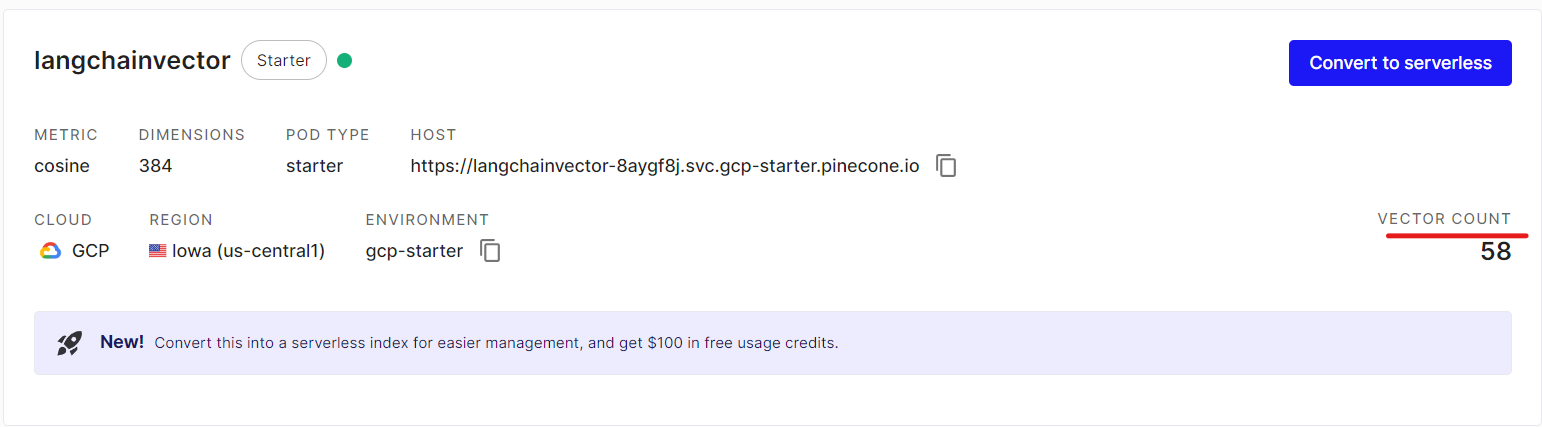

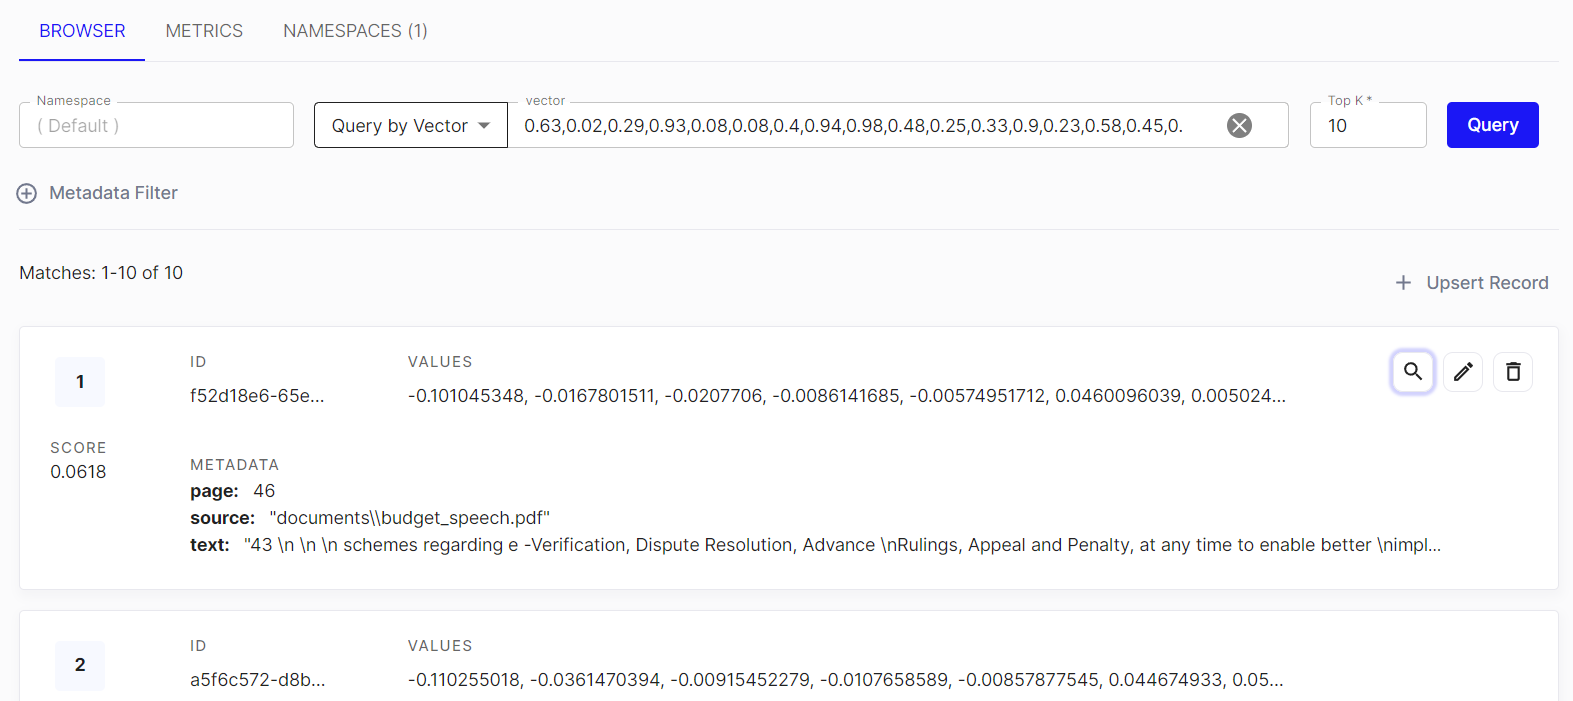

Cosine Similarity Retreive Results from VectorDB

In [64]:
## Cosine Similarity Retreive Results from VectorDB
def retrieve_query(query,k=2):
    matching_results=index.similarity_search(query,k=k)
    return matching_results

Read the LLLM model from Hugging face Hub

In [65]:
# Read the LLM Model from hugging face hub
llm = HuggingFaceHub(repo_id = "HuggingFaceH4/zephyr-7b-alpha", model_kwargs = {"temperature":0.5, "max_new_tokens":512, "max_length":64})

Create Q & A application

In [66]:
# Create Q & A application
chain=load_qa_chain(llm,chain_type="stuff")

Search answers from VectorDB

In [67]:
## Search answers from VectorDB
def retrieve_answers(query):
    doc_search=retrieve_query(query)
    print(doc_search)
    response=chain.run(input_documents=doc_search,question=query)
    return response

Shoot your questions here

In [68]:
our_query = "How much the agriculture target will be increased by how many crore?"
answer = retrieve_answers(our_query)
print(answer)

[Document(page_content="6 \n \n \n inclusive, farmer-centric solutions through relevant information services for \ncrop planning and health, improved access to farm inputs, credit, and \ninsurance, help for crop estimation, market intelligence, and support for \ngrowth of agri-tech industry and start-ups.  \nAgriculture Accelerator Fund  \n17. An Agriculture Accelerator Fund will be set-up to encourage agri-\nstartups by young entrepreneurs in rural areas. The Fund will aim at \nbringing innovative and affordable solutions for challenges faced by \nfarmers. It will also bring in modern technologies to transform agricultural \npractices, increase productivity and profitability. \nEnhancing productivity of cotton crop  \n18. To enhance the productivity of extra-long staple cotton, we will \nadopt a cluster-based and value chain approach through Public Private \nPartnerships (PPP). This will mean collaboration between farmers, state and \nindustry for input supplies, extension services, a

Reference:

End To End LLM Langchain Project using Pinecone Vector Database - https://www.youtube.com/watch?v=erUfLIi9OFM